# Demonstrations

## A Simple Decision Tree

Here, we demonstrate the construction of a simple decision tree with `sklearn`. It's not only easy to build one but `sklearn` even gives routines to visualize it.

Feature: Siblings 	 Split: 1.5 	 Variance Reduction 2.7
Feature: Hours Slept 	 Split: 8.0 	 Variance Reduction 8.7
Feature: Hours TikTok 	 Split: 0.5 	 Variance Reduction 8.7
Feature: Hours TikTok 	 Split: 1.5 	 Variance Reduction 1.7


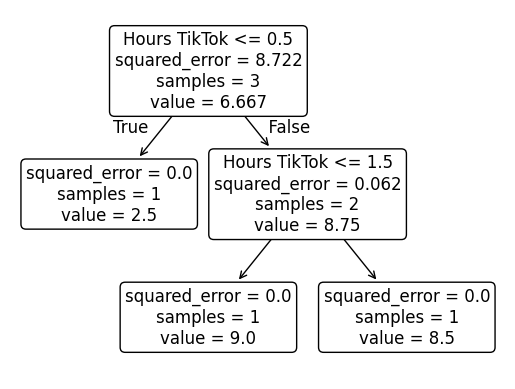

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import calorie_IT

from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.DataFrame(columns=['Name', 'Siblings', 'Hours Slept', 'Hours TikTok', 'Stress'])
df.loc[1] = ['Henry', 2, 9, 0, 2.5]
df.loc[2] = ['Simona', 1, 7, 1, 9]
df.loc[3] = ['Abby', 2, 7, 2, 8.5]

features = ['Siblings', 'Hours Slept', 'Hours TikTok']
target = 'Stress'

# demonstrate how to determine the root node
n_tot = len(df)
var_tot = np.var(df[target])
for feature in features:
    values = np.sort(np.unique(df[feature]))
    for s in 0.5 * (values[1:] + values[:-1]):
        n_left = np.sum(df[feature] < s)
        var_left = np.var(df[target][df[feature] < s])
        n_right = np.sum(df[feature] >= s)
        var_right = np.var(df[target][df[feature] >= s])
        d_var = var_tot - n_left / n_tot * var_left - n_right / n_tot * var_right
        print(f'Feature: {feature} \t Split: {s} \t Variance Reduction {d_var:.1f}')

# build the actual tree
features = ['Siblings', 'Hours Slept', 'Hours TikTok']
X = df[features].to_numpy()
y = df[target].to_numpy()
tree = DecisionTreeRegressor().fit(X, y)

# visualize the tree
plot_tree(tree, feature_names=features, rounded=True);

## Decision Trees and Overfitting

Unfortunately, single decision trees, especially with no limits on tree depth, lower bound on leaf size etc., are extremely prone to overfitting.

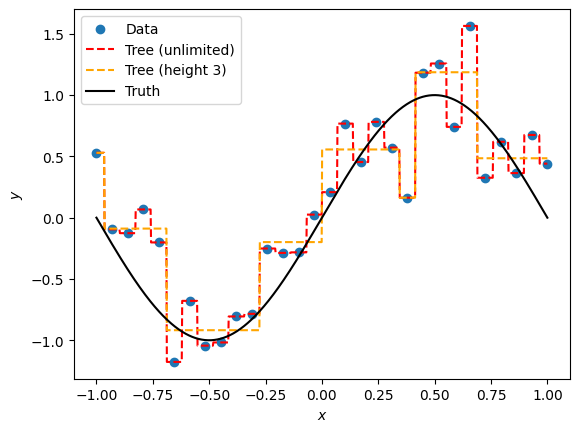

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree

def f(X):
    return np.sin(X[:, 0] * np.pi)

np.random.seed(0)
X_train = np.linspace(-1, +1, 30).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.3

plt.scatter(X_train[:, 0], y_train, label='Data')
X = np.linspace(-1, +1, 1000).reshape(-1, 1)
plt.plot(X[:, 0], DecisionTreeRegressor().fit(X_train, y_train).predict(X),
         color='red', ls='--', label='Tree (unlimited)')
plt.plot(X[:, 0], DecisionTreeRegressor(max_depth=3).fit(X_train, y_train).predict(X),
         color='orange', ls='--', label='Tree (height 3)')
plt.plot(X[:, 0], f(X), color='black', ls='-', label='Truth')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best');

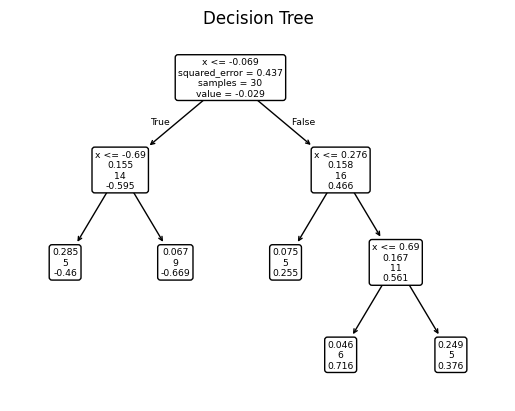

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
X_train = np.linspace(-1, +1, 30).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.3
plot_tree(DecisionTreeRegressor(min_samples_leaf=5).fit(X_train, y_train), feature_names=['x'],
          rounded=True, label='root')
plt.title('Decision Tree');

## Random Forests

Random forests mititage the overfitting of individual decision trees, as demonstrated here.

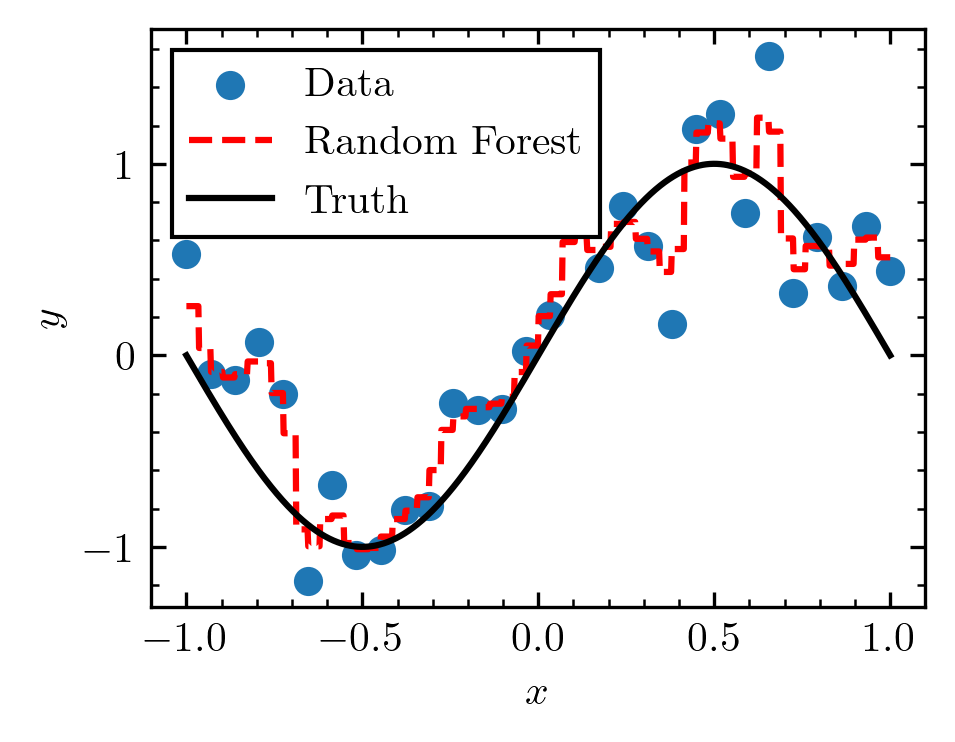

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor

def f(X):
    return np.sin(X[:, 0] * np.pi)

np.random.seed(0)
X_train = np.linspace(-1, +1, 30).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.3

plt.scatter(X_train[:, 0], y_train, label='Data')
X = np.linspace(-1, +1, 1000).reshape(-1, 1)
plt.plot(X[:, 0], RandomForestRegressor().fit(X_train, y_train).predict(X),
         color='red', ls='--', label='Random Forest')
plt.plot(X[:, 0], f(X), color='black', ls='-', label='Truth')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best');

## Random Forests in Practice

Here, we return to the earlier diabetes data set that we explored with linear regression. As you can see, linear regression still outperforms random forest regression on this small data set ($n=442$). Here, we also plot the importance of all features. Remember that the BMI was the most significant predictor of diabetes in the linear regression (among age, sex, BMI, and blood pressure). Note that we also include $6$ more features which measure blood results such as triglycerides level (`s5`).

Linear Regression CV Score: 0.482
Random Forest CV Score: 0.419


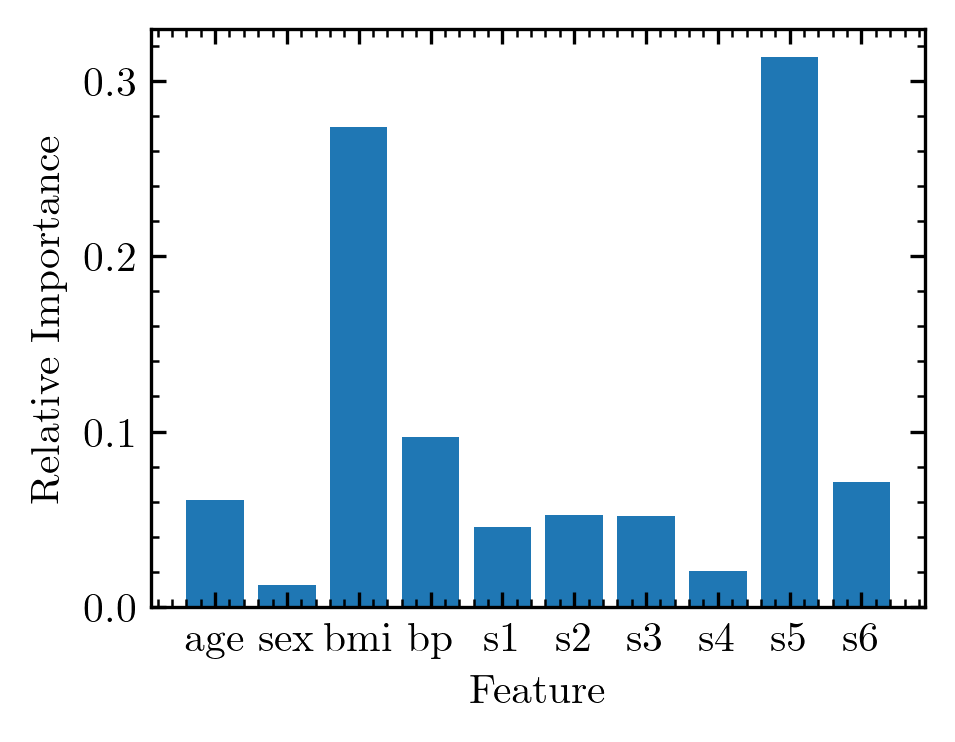

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X, y = load_diabetes(return_X_y=True)

print("Linear Regression CV Score: "
      f"{np.mean(cross_val_score(LinearRegression(), X, y)):.3f}")
print("Random Forest CV Score: "
      f"{np.mean(cross_val_score(RandomForestRegressor(), X, y)):.3f}")

rf = RandomForestRegressor().fit(X, y)
plt.bar(load_diabetes(as_frame=True).feature_names, rf.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Relative Importance');

# Exercise: California Housing

In this exercise, we will apply random forests to the California housing data set. The goal is to predict the median house value based on $8$ other predictive attributes.

(a) Plot histograms of the distributions of the $8$ independent variables.

(b) Compute the cross-validation $R^2$ score for a simple linear regression model. This will serve as our baseline to compare the random forests against.

(c) Compute the cross-validation score for a simple, out-of-the-box decision tree. How does it compare against the simple linear model? Which performs better and why?

(d) Compute the cross-validation score for a random forest as a function of the number of trees $n_{\rm tree}$. Plot the cross-validation $R^2$ score as a function of $n_{\rm tree}$ from $1$ to $10$.

(e) Using the random forest with $10$ trees, plot the feature importance of the $8$ independent variables. Which features are most informative for predicting house prices?

(f) Optimize the hyperparameters of the random forest using cross-validation. What are the (near) optimal parameters and score?

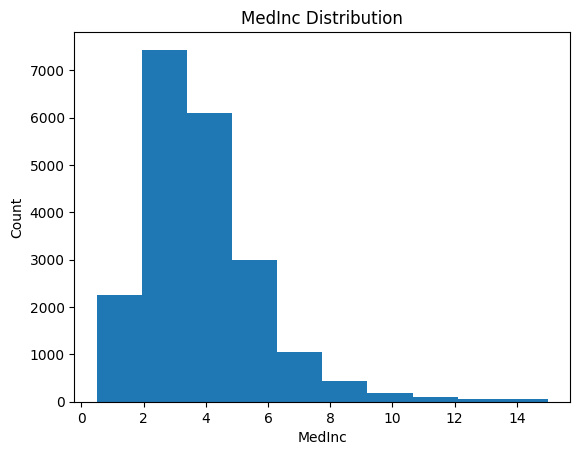

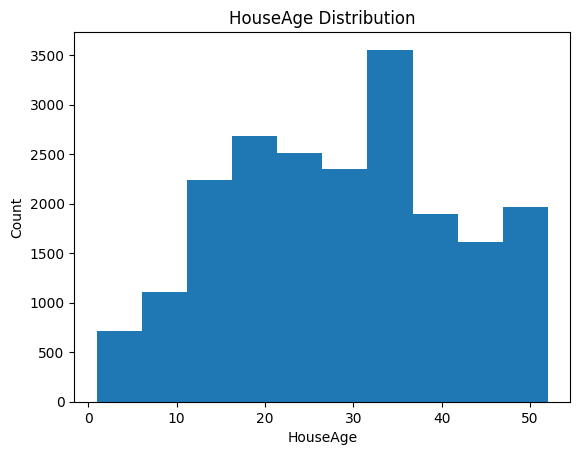

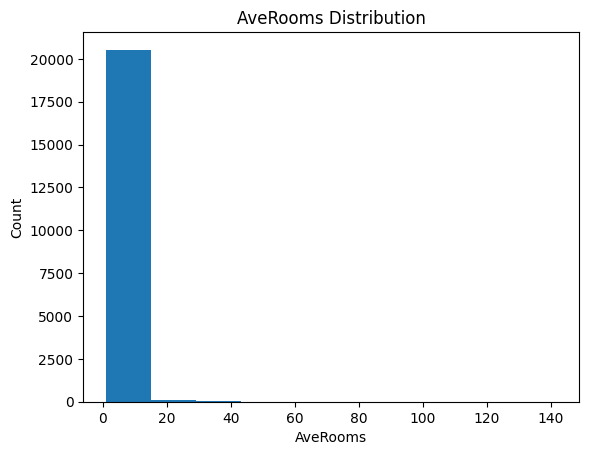

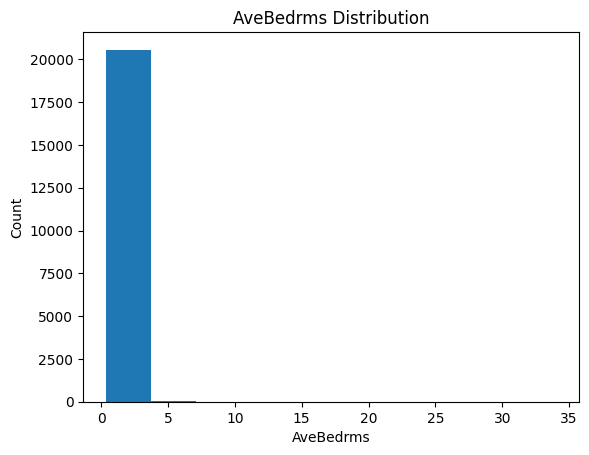

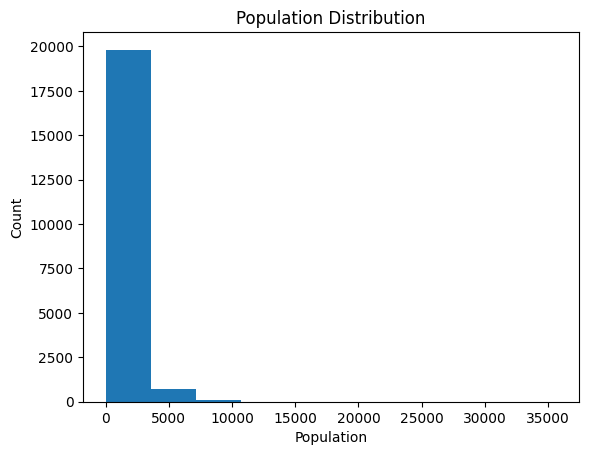

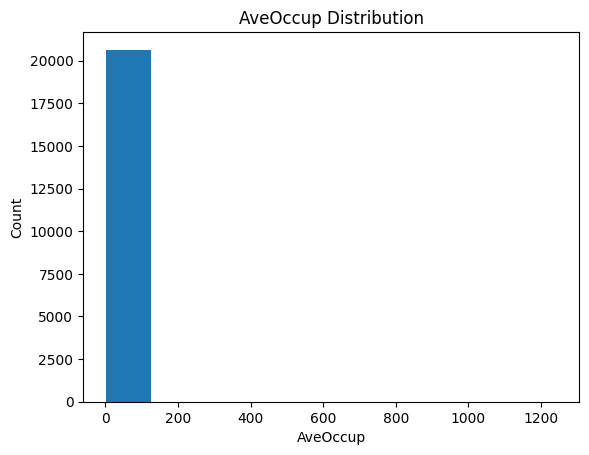

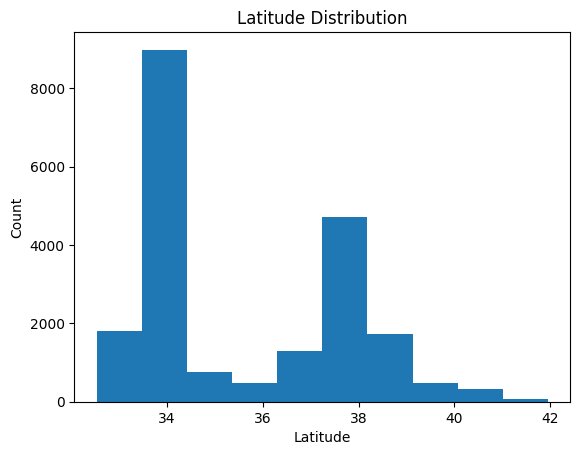

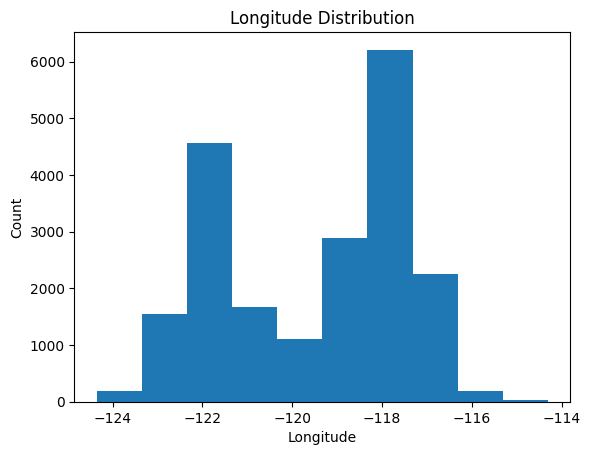

Linear Regression CV Score: 0.55303
Decision Tree CV Score: 0.35747

Random Forests:
1-Tree Forest CV Score: 0.28646
2-Tree Forest CV Score: 0.45583
3-Tree Forest CV Score: 0.55459
4-Tree Forest CV Score: 0.57945
5-Tree Forest CV Score: 0.57919
6-Tree Forest CV Score: 0.58948
7-Tree Forest CV Score: 0.59239
8-Tree Forest CV Score: 0.61315
9-Tree Forest CV Score: 0.61545
10-Tree Forest CV Score: 0.61496
10-Tree Forest CV Score: 0.63420
{'max_depth': 17, 'n_estimators': 10}
0.7950622220433368


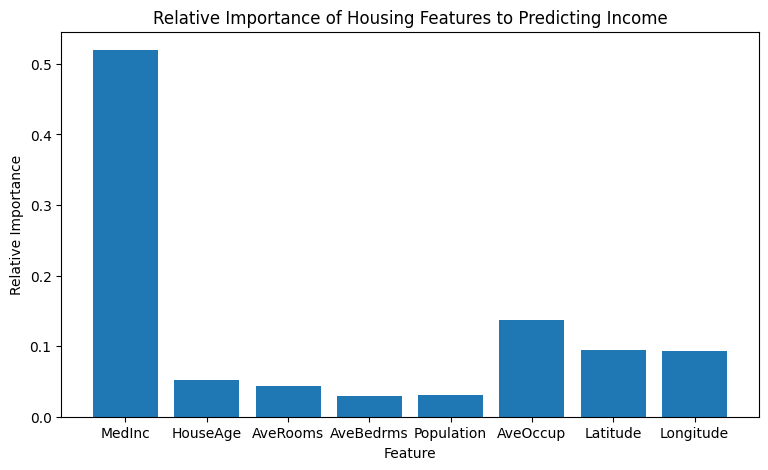

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import numpy as np

# load the data as X and y for easy use with sklearn
X, y = fetch_california_housing(return_X_y=True)

# also load as pandas data frame for easy exploration
cali_housing = fetch_california_housing(as_frame=True)
df = cali_housing.data
names = cali_housing.feature_names
df['target'] = y

def a():
    for name in names:
        plt.title(str(name) + " Distribution")
        plt.hist(df[str(name)])
        plt.xlabel(str(name))
        plt.ylabel('Count')
        plt.show()

def b_and_c():
    print("Linear Regression CV Score: "
          f"{np.mean(model_selection.cross_val_score(LinearRegression(), X, y)):.5f}")
    print("Decision Tree CV Score: "
          f"{np.mean(model_selection.cross_val_score(DecisionTreeRegressor(), X, y)):.5f}")

def d():
    print("\nRandom Forests:")
    for num_trees in range(1, 11):
        print(f"{num_trees}-Tree Forest CV Score: {np.mean(model_selection.cross_val_score(RandomForestRegressor(n_estimators=num_trees), X, y)):.5f}")

def e():
    rf = RandomForestRegressor(n_estimators=10).fit(X, y)
    plt.figure(figsize=[9, 5])
    plt.bar(fetch_california_housing(as_frame=True).feature_names, rf.feature_importances_)
    plt.xlabel('Feature')
    plt.ylabel('Relative Importance')
    plt.title('Relative Importance of Housing Features to Predicting Income')

def f():
    print(f"10-Tree Forest CV Score: {np.mean(model_selection.cross_val_score(RandomForestRegressor(n_estimators=10), X, y)):.5f}")

    #model = model_selection.GridSearchCV(RandomForestRegressor(), param_grid= dict(n_estimators = range(10, 11), max_depth = range(14, 17)), cv = model_selection.KFold(n_splits = 10, shuffle = True))
    model = model_selection.GridSearchCV(RandomForestRegressor(), param_grid= dict(n_estimators = range(10, 11), max_depth = range(16, 21)), cv = model_selection.KFold(n_splits = 10, shuffle = True))
    model.fit(X, y)
    print(model.best_params_)
    print(model.best_score_)

a()
b_and_c()
d()
e()
f()